In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
#Load the dataset
#Note: replace location with dataset location on local machine

loandf = pd.read_csv(r"D:\Study\upGrad\Statistics Essentials\Case Study\Data\loan\loan.csv",low_memory=False)

Data Cleaning Process
1. Fiter dataframe for relevent data for analysis (eg. filter out all the data where loan_status is Current)
2. This step will result in reducing the nu,ber of rows
3. Next step is null treatment, starting with removing columns having more than 30% null values
4. Start analysis of unique values in columns, if there is only one unique value then column can be dropped as it'll not have any influence on result
5. if there too many unique values in column which is alphanumeric, this too can be dropped as there will be too many category to consider in analysis

In [4]:
rows_num = loandf[loandf['loan_status']!='Current'].shape[0]  #38577
loandf = loandf[loandf['loan_status']!='Current']

In [5]:
nullsincols = loandf.isnull().sum()
loandf = loandf.drop(nullsincols[nullsincols/rows_num>0.3].index.tolist(), axis = 1)

In [6]:
uniquevaluesincols = loandf.nunique()
loandf = loandf.drop(uniquevaluesincols[uniquevaluesincols==1].index.tolist(), axis = 1)
cols_excl_if_alpha = uniquevaluesincols[uniquevaluesincols>=1000].index.tolist()
exc_non_categorical_alpha_cols = [col for col in cols_excl_if_alpha if loandf[col].dtype =='object']
loandf = loandf.drop(exc_non_categorical_alpha_cols, axis = 1)

In [7]:
final_loan_df = loandf.drop(columns = ['id','member_id'])

In [8]:
final_loan_df['term'] = pd.to_numeric(final_loan_df['term'].map(lambda x: x.rstrip(' months')),errors='coerce')#remove 'months'

In [9]:
 final_loan_df['emp_length'] = pd.to_numeric(final_loan_df['emp_length'].str.replace('[<>+]+','',regex=True).replace(r'\s*year[\w]*\s*','',regex=True),errors='coerce')

In [10]:
final_loan_df.to_csv(r"D:\Study\upGrad\Statistics Essentials\Case Study\Data\loan\clean_loan.csv")

Data Analysis
1. Univariate Analysis
2. Segmented Univariate Analysis
3. Bivariate Analysis

1. Univariate Analysis
    * Categorical Data Analysis
    * Quantitaive Data Analysis

In [11]:
cols = final_loan_df.columns

In [12]:
plt.rcParams['figure.figsize'] = [8, 5]

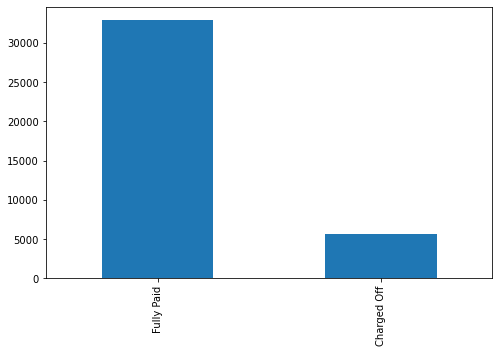

In [13]:
plot = final_loan_df['loan_status'].value_counts().plot.bar()
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Univariate Analysis\loan_status_figure.jpg')

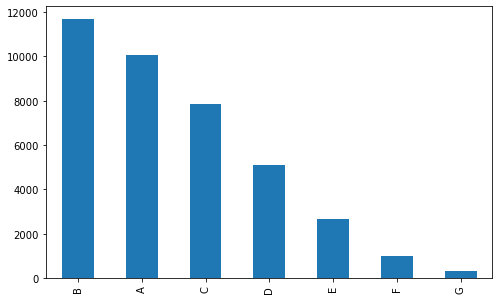

In [14]:
plot = final_loan_df['grade'].value_counts().plot.bar()
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Univariate Analysis\grade_figure.jpg')

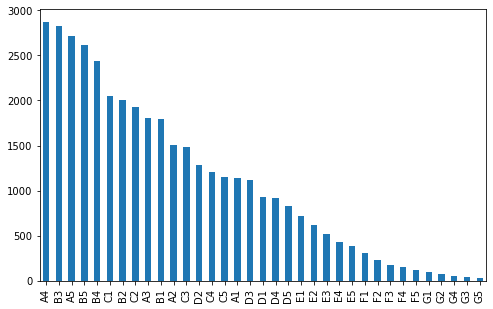

In [15]:
plot = final_loan_df['sub_grade'].value_counts().plot.bar()
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Univariate Analysis\sub_grade_figure.jpg')

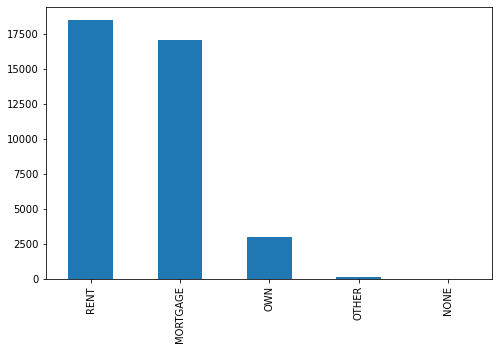

In [16]:
plot = final_loan_df['home_ownership'].value_counts().plot.bar()
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Univariate Analysis\home_ownership_figure.jpg')

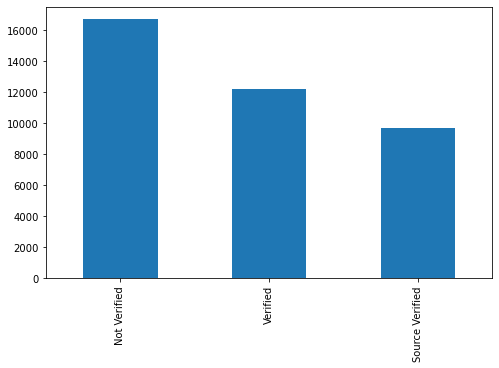

In [17]:
final_loan_df['verification_status'].value_counts().plot.bar()
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Univariate Analysis\loan_status_figure.jpg')

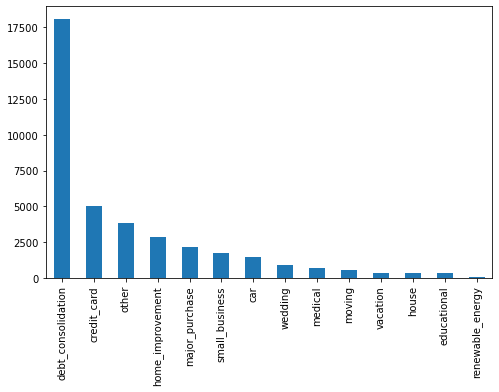

In [18]:
plot = final_loan_df['purpose'].value_counts().plot.bar()
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Univariate Analysis\purpose_figure.jpg')

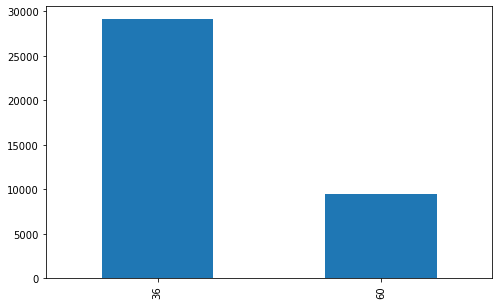

In [19]:
plot = final_loan_df['term'].value_counts().plot.bar()
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Univariate Analysis\term_figure.jpg')

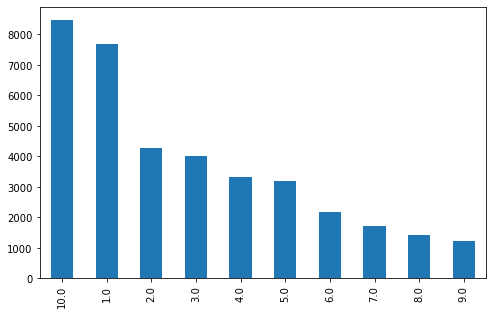

In [21]:
plot = final_loan_df['emp_length'].value_counts().plot.bar()
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Univariate Analysis\emp_length_figure.jpg')

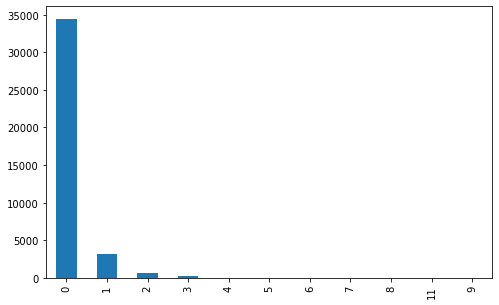

In [23]:
plot = final_loan_df['delinq_2yrs'].value_counts().plot.bar()
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Univariate Analysis\delinq_2yrs_figure.jpg')

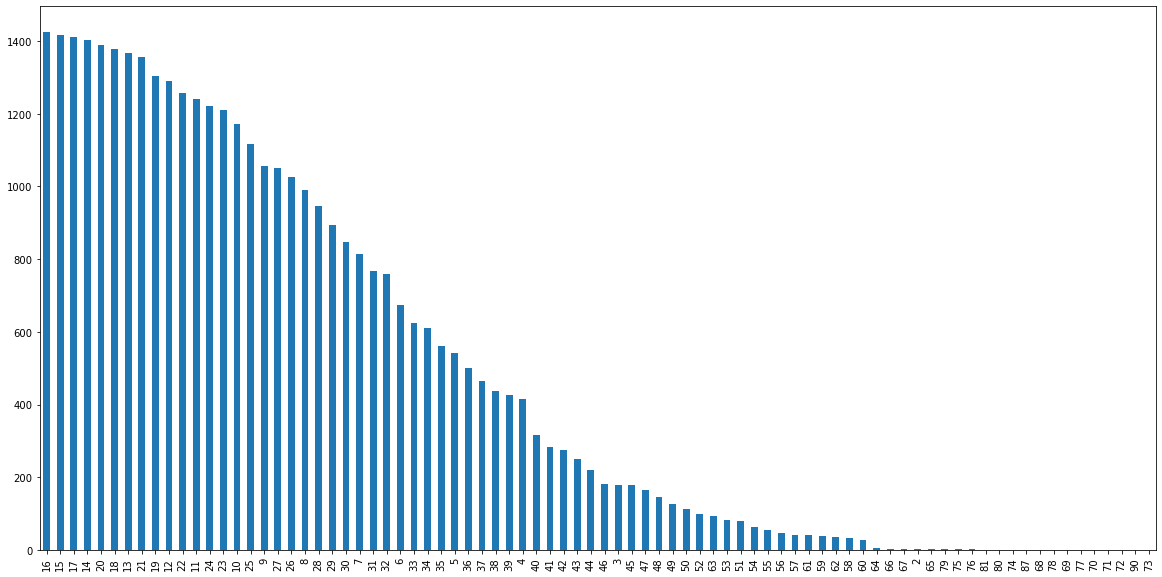

In [24]:
plt.rcParams['figure.figsize'] = [20, 10]
plot = final_loan_df['total_acc'].value_counts().plot.bar()
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Univariate Analysis\total_acc_figure.jpg')

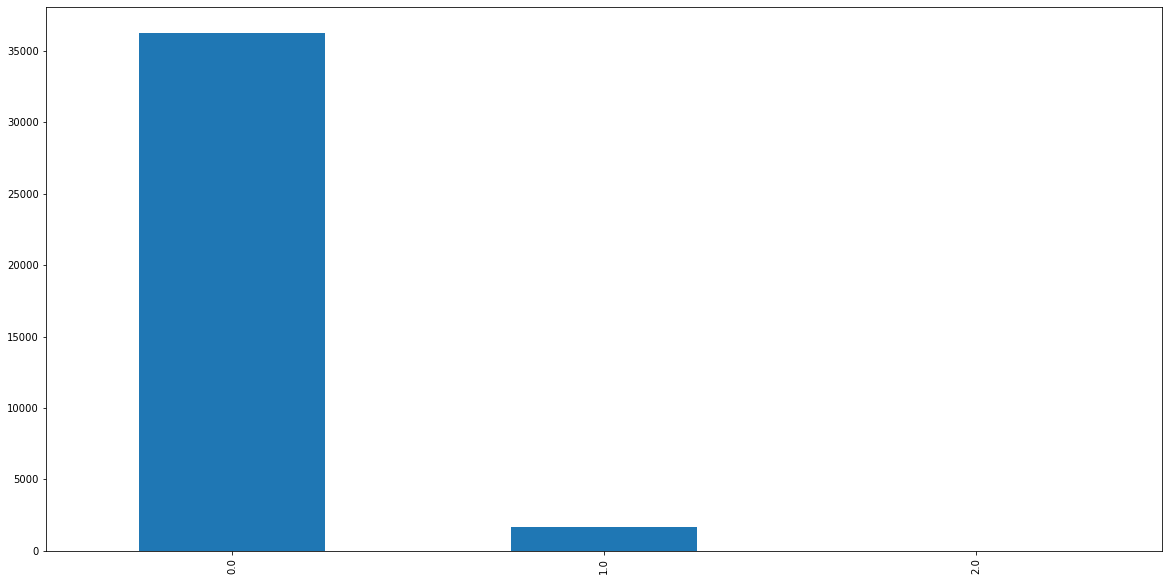

In [25]:
plot = final_loan_df['pub_rec_bankruptcies'].value_counts().plot.bar()
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Univariate Analysis\pub_rec_bankruptcies_figure.jpg')

In [26]:
univariate_data = []
for i in cols:
    if final_loan_df[i].dtype != 'object':
       univariate_data.append([i, final_loan_df[i].mean(),final_loan_df[i].median(),final_loan_df[i].mode()])

In [27]:
pd.DataFrame(univariate_data,columns = ['Col','Mean','Median','Mode'])

,Col,Mean,Median,Mode
0,loan_amnt,11047.025430,9600.000000,0 10000 dtype: int64
1,funded_amnt,10784.058506,9550.000000,0 10000 dtype: int64
2,funded_amnt_inv,10222.481123,8733.440000,0 5000.0 dtype: float64
3,term,41.898437,36.000000,0 36 dtype: int64
4,installment,322.466318,277.860000,0 311.11 dtype: float64
5,emp_length,5.061048,4.000000,0 10.0 dtype: float64
6,annual_inc,68777.973681,58868.000000,0 60000.0 dtype: float64
7,dti,13.272727,13.370000,0 0.0 dtype: float64
8,delinq_2yrs,0.146668,0.000000,0 0 dtype: int64
9,inq_last_6mths,0.871737,1.000000,0 0 dtype: int64


2. Segmented Univariate Analysis

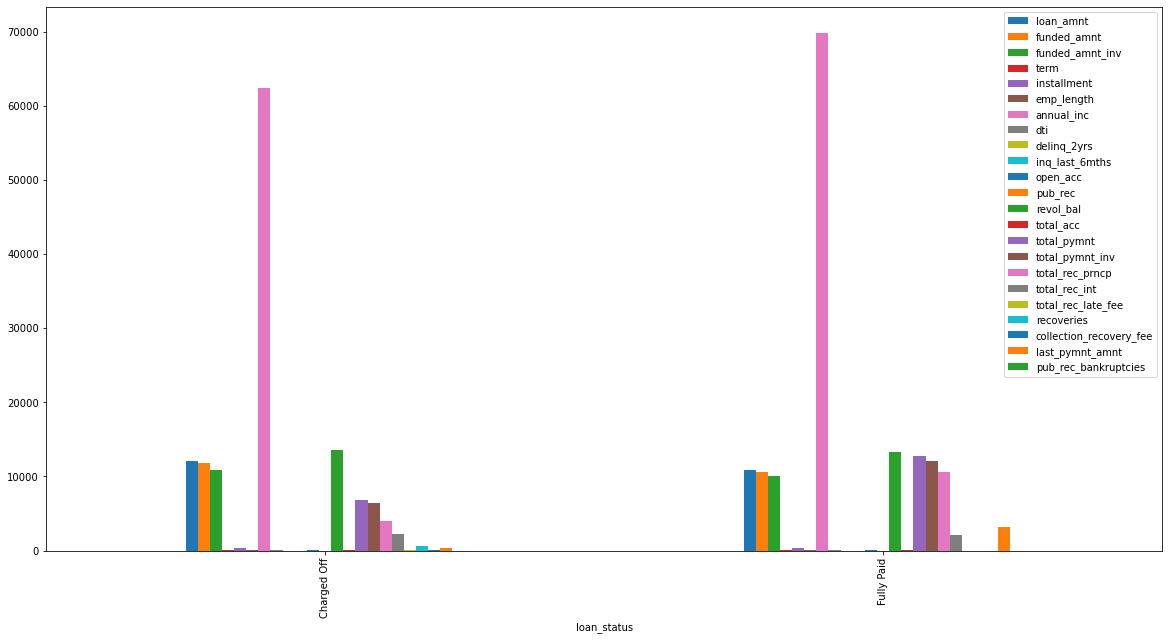

In [28]:
plt.rcParams['figure.figsize'] = [20, 10]
plot = final_loan_df.groupby('loan_status').mean().plot.bar().legend(loc=1)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_mean_figure.jpg')

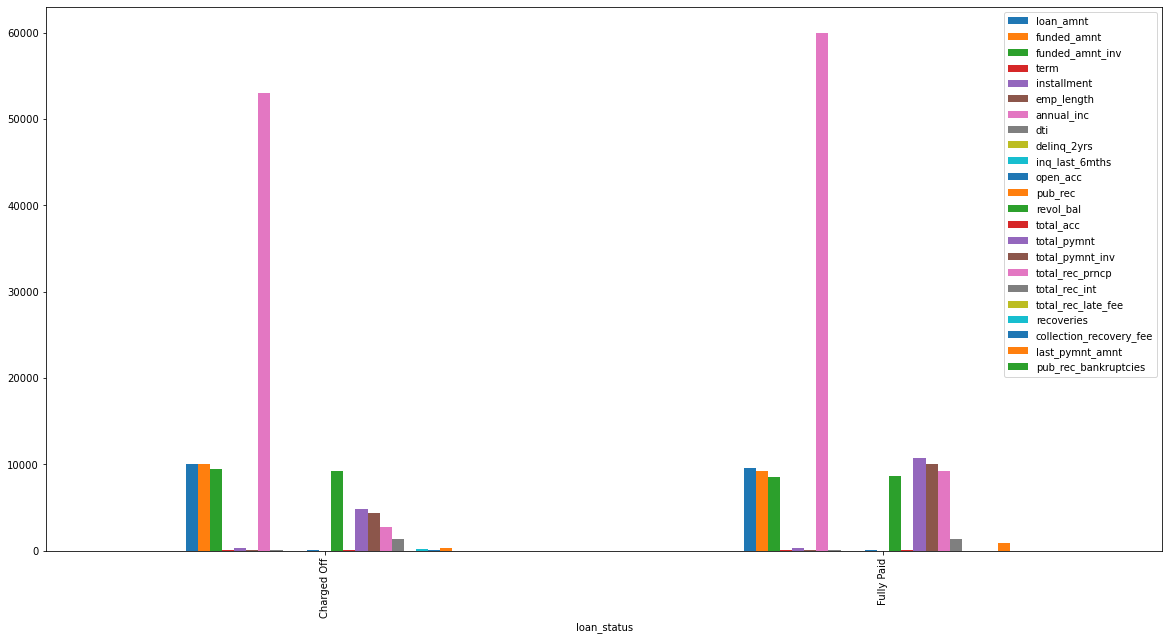

In [29]:
plt.rcParams['figure.figsize'] = [20, 10]
plot = final_loan_df.groupby('loan_status').median().plot.bar().legend(loc=1)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_median_figure.jpg')

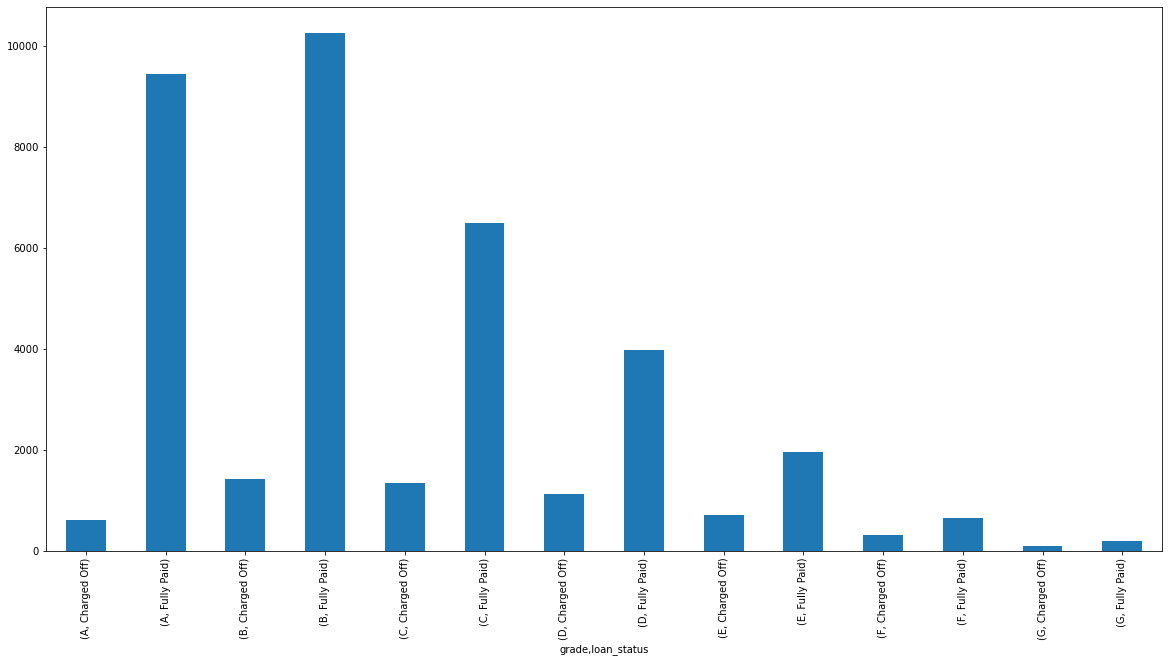

In [30]:
plot = final_loan_df[['grade','loan_status']].groupby(['grade','loan_status']).size().plot.bar(stacked=True)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_grade_figure.jpg')

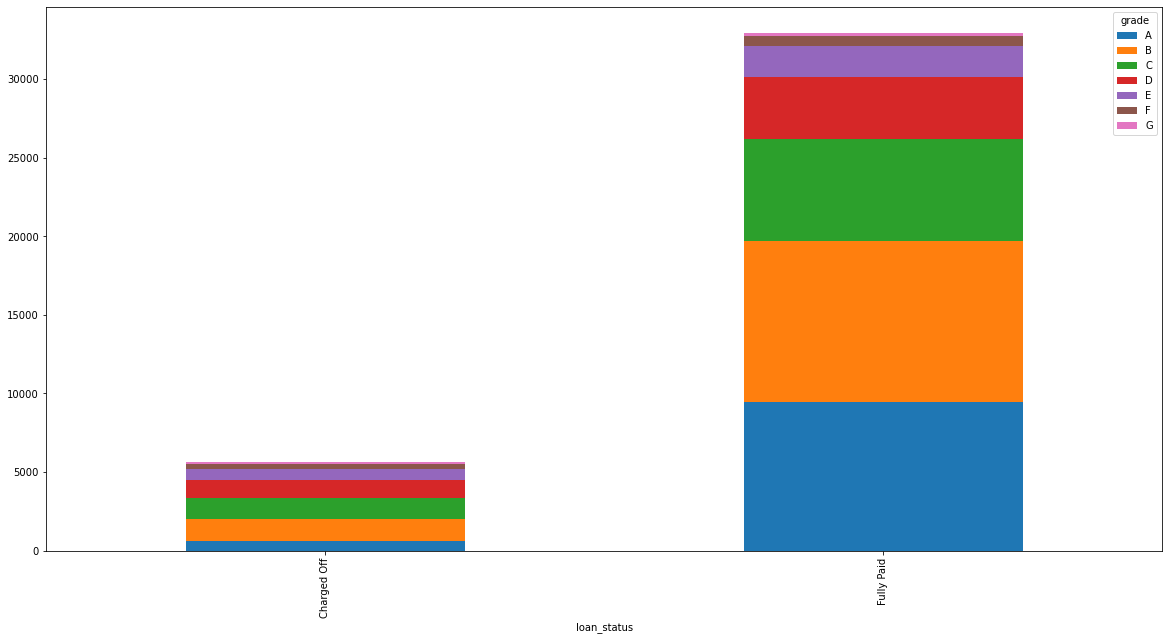

In [31]:
plt.rcParams['figure.figsize'] = [20, 10]
plot = final_loan_df[['grade','loan_status']].groupby(['grade','loan_status'])['loan_status'].count().unstack('grade').plot.bar(stacked = True)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_grade_loanstatus_figure.jpg')

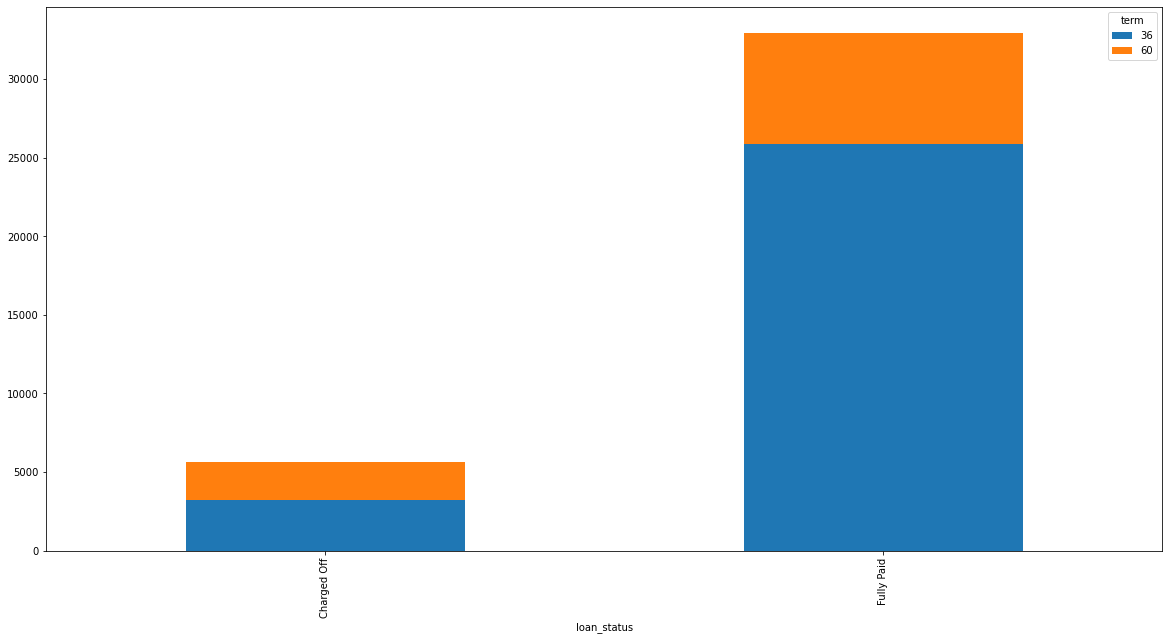

In [32]:
plot = final_loan_df[['term','loan_status']].groupby(['term','loan_status'])['loan_status'].count().unstack('term').plot.bar(stacked = True)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_term_loanstatus_figure.jpg')

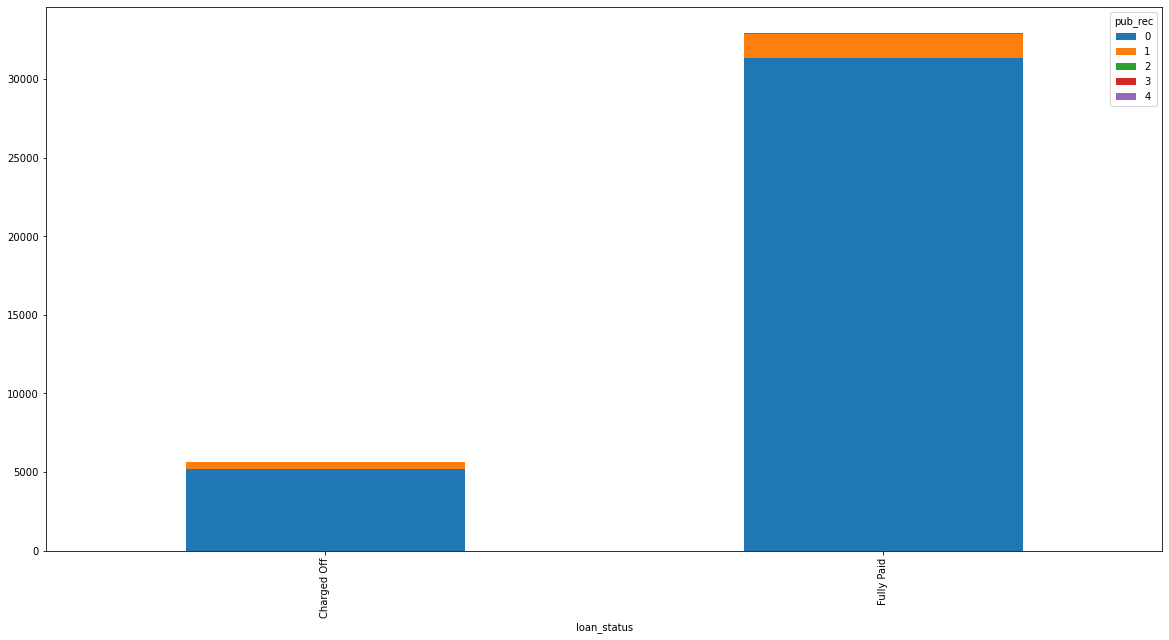

In [33]:
plot = final_loan_df[['pub_rec','loan_status']].groupby(['pub_rec','loan_status'])['loan_status'].count().unstack('pub_rec').plot.bar(stacked = True)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_pub_rec_loanstatus_figure.jpg')

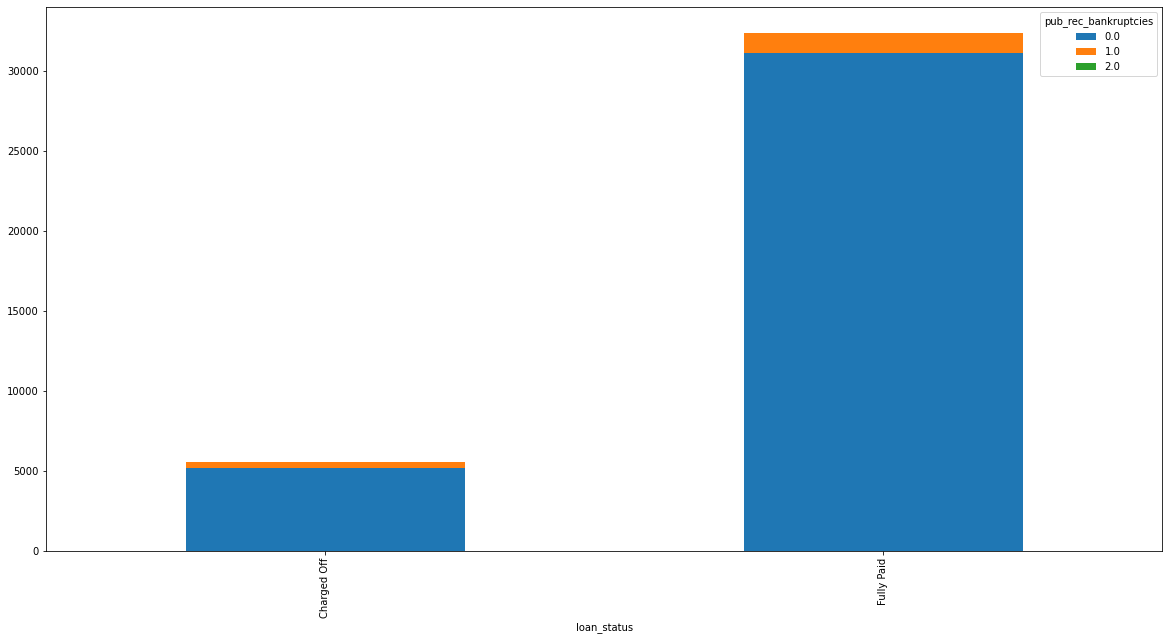

In [34]:
plot = final_loan_df[['pub_rec_bankruptcies','loan_status']].groupby(['pub_rec_bankruptcies','loan_status'])['pub_rec_bankruptcies'].count().unstack('pub_rec_bankruptcies').plot.bar(stacked = True)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_pub_rec_bankruptcies_loanstatus_figure.jpg')

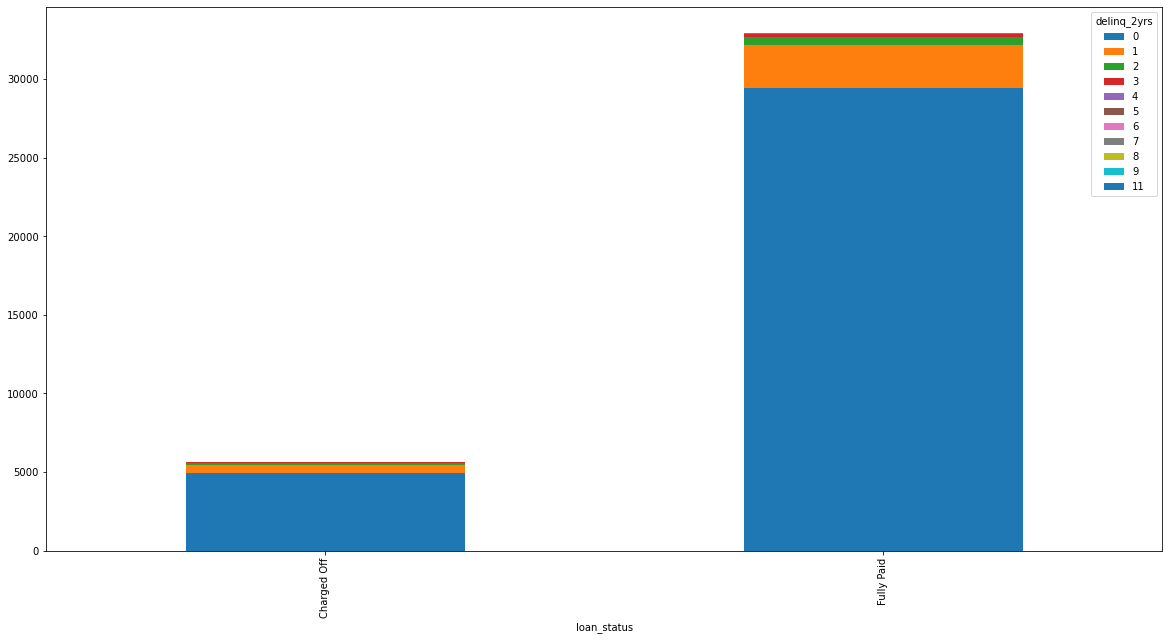

In [35]:
plot = final_loan_df[['delinq_2yrs','loan_status']].groupby(['delinq_2yrs','loan_status'])['delinq_2yrs'].count().unstack('delinq_2yrs').plot.bar(stacked = True)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_delinq_2yrs_loanstatus_figure.jpg')

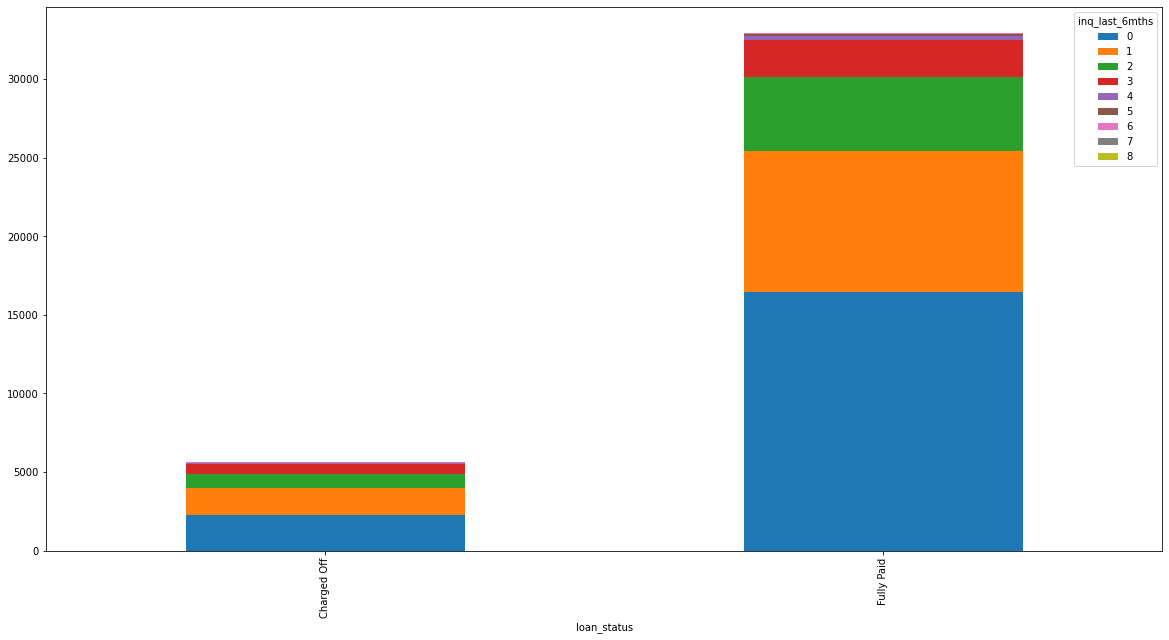

In [36]:
plot = final_loan_df[['inq_last_6mths','loan_status']].groupby(['inq_last_6mths','loan_status'])['inq_last_6mths'].count().unstack('inq_last_6mths').plot.bar(stacked = True)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_inq_last_6mths_loanstatus_figure.jpg')

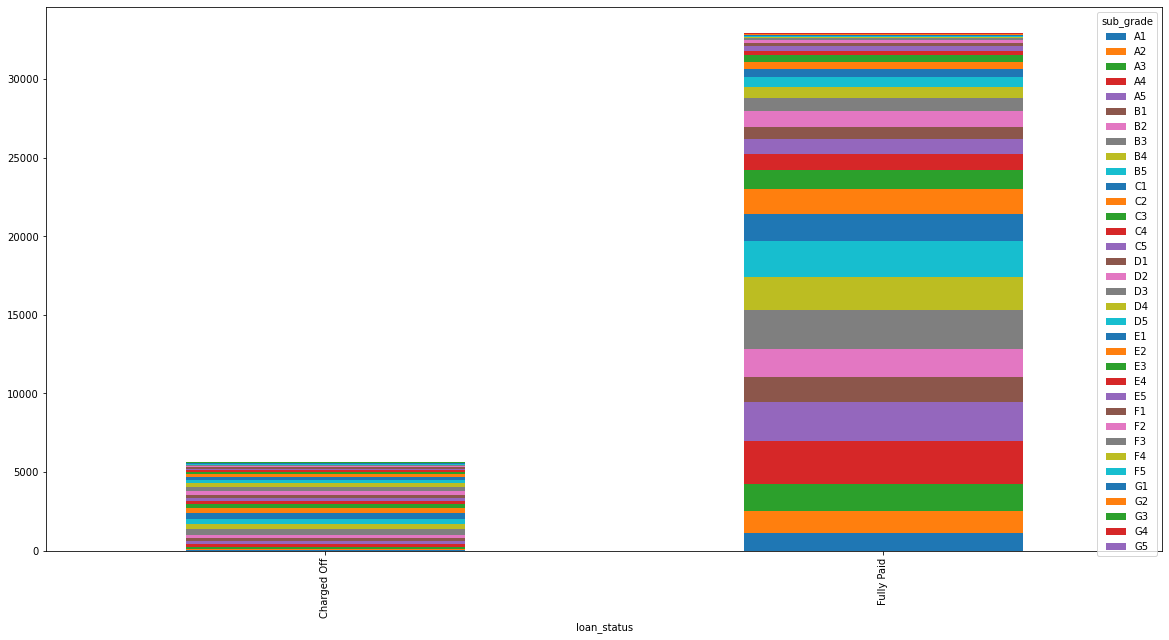

In [37]:
plot = final_loan_df[['sub_grade','loan_status']].groupby(['sub_grade','loan_status'])['sub_grade'].count().unstack('sub_grade').plot.bar(stacked = True)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_sub_grade_loanstatus_figure.jpg')

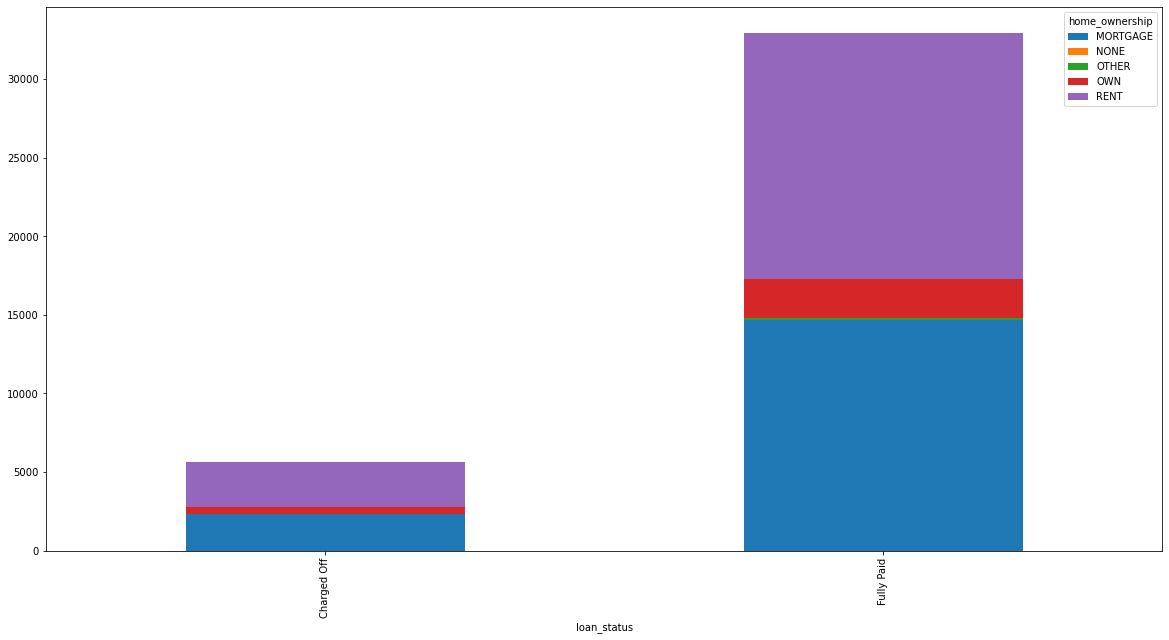

In [38]:
plot = final_loan_df[['home_ownership','loan_status']].groupby(['home_ownership','loan_status'])['home_ownership'].count().unstack('home_ownership').plot.bar(stacked = True)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_home_ownership_loanstatus_figure.jpg')

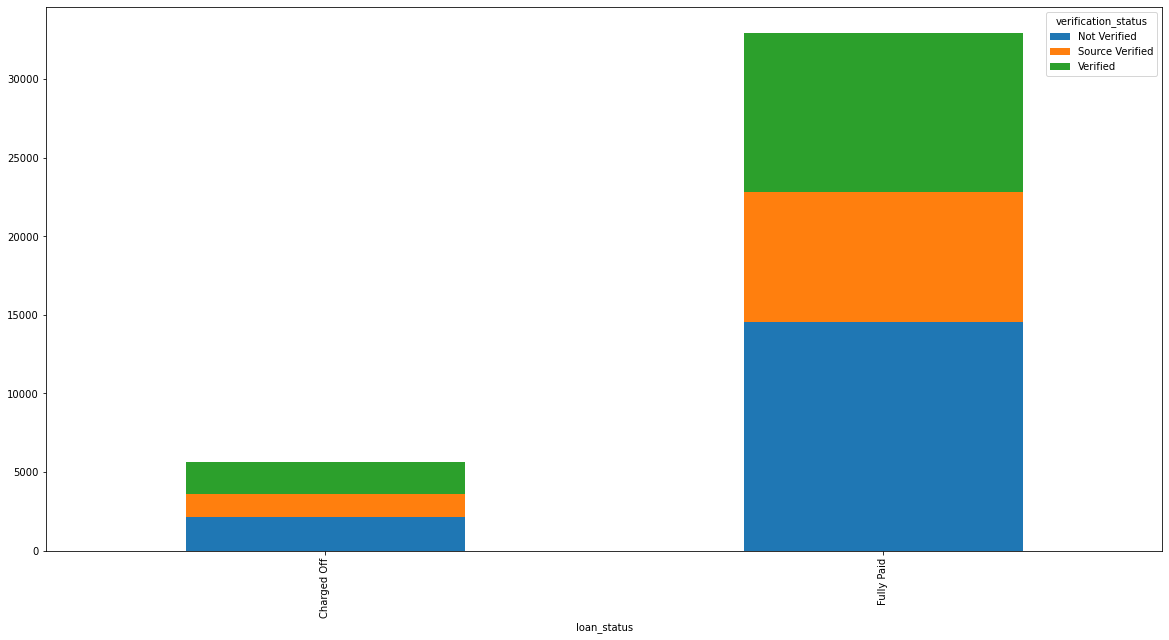

In [39]:
plot = final_loan_df[['verification_status','loan_status']].groupby(['verification_status','loan_status'])['verification_status'].count().unstack('verification_status').plot.bar(stacked = True)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_verification_status_loanstatus_figure.jpg')

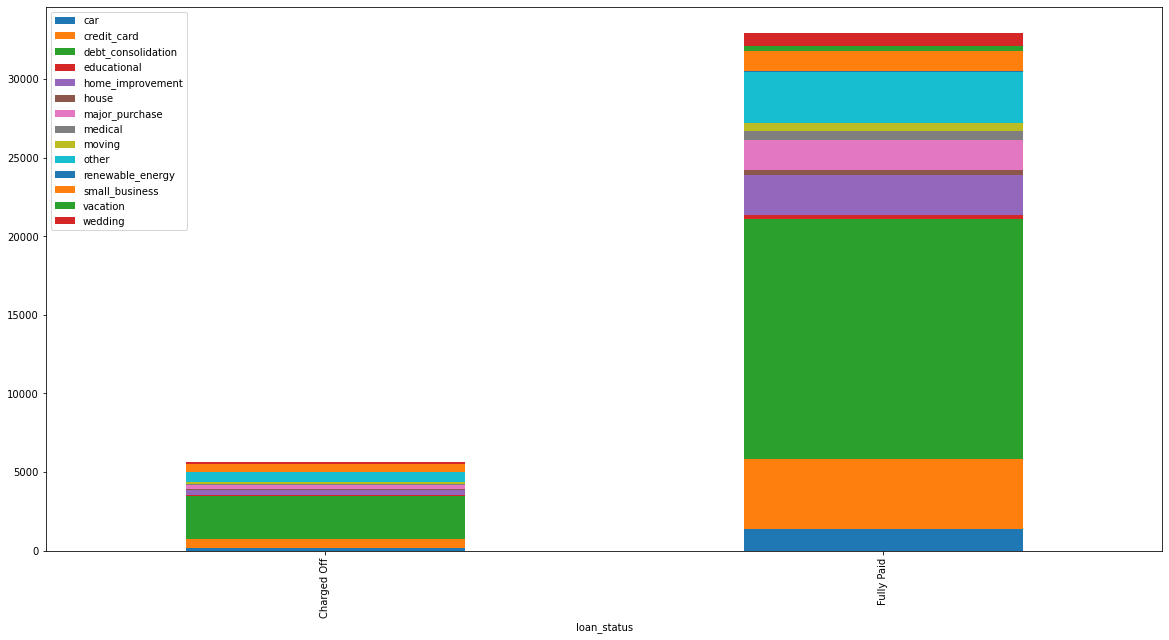

In [40]:
plot = final_loan_df[['purpose','loan_status']].groupby(['purpose','loan_status'])['purpose'].count().unstack('purpose').plot.bar(stacked = True).legend(loc=2)
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Seg Univariate Analysis\seg_purpose_loanstatus_figure.jpg')

3. Bivariate Analysis

In [41]:
final_loan_df.drop(columns = ['loan_amnt','funded_amnt','funded_amnt_inv','term']).corr()

,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
installment,1.000000,0.121101,0.267842,0.052038,-0.019755,0.011014,0.172893,-0.045706,0.309501,0.229860,0.858493,0.817665,0.847762,0.642655,0.058387,0.121463,0.077519,0.413588,-0.033361
emp_length,0.121101,1.000000,0.111107,0.048619,0.015420,0.010509,0.096527,0.064306,0.152202,0.208555,0.131086,0.141446,0.122603,0.115818,-0.016251,0.026485,0.007130,0.083555,0.063212
annual_inc,0.267842,0.111107,1.000000,-0.121530,0.022229,0.035465,0.156927,-0.017864,0.277374,0.234534,0.256313,0.245198,0.256848,0.185056,0.006814,0.022184,0.015981,0.143242,-0.016224
dti,0.052038,0.048619,-0.121530,1.000000,-0.033347,0.002178,0.287849,-0.004742,0.228090,0.229119,0.059274,0.066277,0.036755,0.103104,-0.011412,0.026162,0.011744,0.008566,0.005966
delinq_2yrs,-0.019755,0.015420,0.022229,-0.033347,1.000000,0.008733,0.011649,0.007623,-0.054437,0.066994,-0.023130,-0.029608,-0.038447,0.023778,0.028772,0.012443,0.014077,-0.012511,0.003404
inq_last_6mths,0.011014,0.010509,0.035465,0.002178,0.008733,1.000000,0.093434,0.023726,-0.020787,0.113516,-0.008244,-0.018589,-0.021328,0.026549,0.030741,0.018899,0.012388,0.027772,0.015517
open_acc,0.172893,0.096527,0.156927,0.287849,0.011649,0.093434,1.000000,0.000028,0.288055,0.687260,0.162141,0.152008,0.159997,0.123478,-0.018827,0.017241,0.006674,0.082396,0.005803
pub_rec,-0.045706,0.064306,-0.017864,-0.004742,0.007623,0.023726,0.000028,1.000000,-0.060502,-0.023494,-0.052840,-0.053077,-0.064362,-0.004312,-0.002108,-0.005800,-0.005731,-0.033440,0.845938
revol_bal,0.309501,0.152202,0.277374,0.228090,-0.054437,-0.020787,0.288055,-0.060502,1.000000,0.312634,0.289293,0.273033,0.276761,0.241979,0.005853,0.043593,0.023254,0.125315,-0.048572
total_acc,0.229860,0.208555,0.234534,0.229119,0.066994,0.113516,0.687260,-0.023494,0.312634,1.000000,0.225342,0.219403,0.230140,0.148772,-0.024376,0.024024,0.010952,0.166888,-0.011060


In [42]:
corr_df = final_loan_df.drop(columns = ['loan_amnt','funded_amnt','funded_amnt_inv','term','total_rec_prncp','total_rec_int','total_rec_late_fee','total_pymnt']).corr()

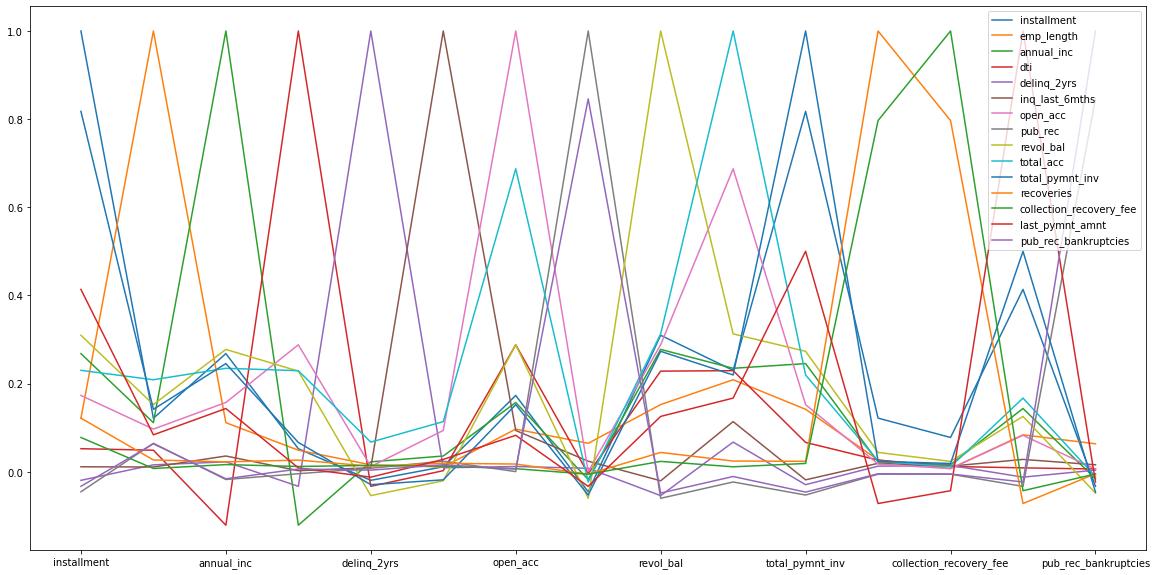

In [43]:
plt.rcParams['figure.figsize'] = [20, 10]
plot = corr_df.plot()
fig = plot.get_figure()
fig.savefig(r'D:\Study\upGrad\Statistics Essentials\Case Study\Submission content\Graphs\Bivariate Analysis\crr_line_figure.jpg')

In [45]:
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)


,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
installment,1.00,0.12,0.27,0.05,-0.02,0.01,0.17,-0.05,0.31,0.23,0.82,0.12,0.08,0.41,-0.03
emp_length,0.12,1.00,0.11,0.05,0.02,0.01,0.10,0.06,0.15,0.21,0.14,0.03,0.01,0.08,0.06
annual_inc,0.27,0.11,1.00,-0.12,0.02,0.04,0.16,-0.02,0.28,0.23,0.25,0.02,0.02,0.14,-0.02
dti,0.05,0.05,-0.12,1.00,-0.03,0.00,0.29,-0.00,0.23,0.23,0.07,0.03,0.01,0.01,0.01
delinq_2yrs,-0.02,0.02,0.02,-0.03,1.00,0.01,0.01,0.01,-0.05,0.07,-0.03,0.01,0.01,-0.01,0.00
inq_last_6mths,0.01,0.01,0.04,0.00,0.01,1.00,0.09,0.02,-0.02,0.11,-0.02,0.02,0.01,0.03,0.02
open_acc,0.17,0.10,0.16,0.29,0.01,0.09,1.00,0.00,0.29,0.69,0.15,0.02,0.01,0.08,0.01
pub_rec,-0.05,0.06,-0.02,-0.00,0.01,0.02,0.00,1.00,-0.06,-0.02,-0.05,-0.01,-0.01,-0.03,0.85
revol_bal,0.31,0.15,0.28,0.23,-0.05,-0.02,0.29,-0.06,1.00,0.31,0.27,0.04,0.02,0.13,-0.05
total_acc,0.23,0.21,0.23,0.23,0.07,0.11,0.69,-0.02,0.31,1.00,0.22,0.02,0.01,0.17,-0.01
